In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

In [2]:
df_tes_1_year = pd.read_csv('../data/raw/TES 1 año.csv')
df_tes_1_year['Fecha'] = pd.to_datetime(df_tes_1_year['Fecha'])
df_tes_1_year = df_tes_1_year.set_index('Fecha')
#df_tes_1_year.sort_values(by='Fecha', ascending=True, inplace=True)

In [3]:
df_tes_1_year.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3786 entries, 2022-04-13 to 2008-03-28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    3786 non-null   float64
 1   Apertura  3786 non-null   float64
 2   Máximo    3786 non-null   float64
 3   Mínimo    3786 non-null   float64
 4   % var.    3786 non-null   float64
dtypes: float64(5)
memory usage: 177.5 KB


The dataset that will be taken as a base contains 3788 rows and 5 columns. Each column has the respective data type (datetime, float...) and there are no null values.

In the general cleaning process, the percentage symbol (%) was removed in the column "%var" and the strign was converted to float, the data format was unified and the dataset was ordered based on the dates.

The data set obtained after the process is:

In [4]:
df_tes_1_year

,Último,Apertura,Máximo,Mínimo,% var.
Fecha,,,,,
2022-04-13,8.610,8.586,8.610,8.586,0.0122
2022-12-04,8.506,8.540,8.556,8.476,-0.0132
2022-11-04,8.620,8.680,8.691,8.620,0.0133
2022-09-04,8.507,8.507,8.507,8.507,0.0000
2022-08-04,8.507,8.395,8.507,8.304,0.0349
...,...,...,...,...,...
2008-04-04,11.035,0.000,0.000,0.000,-0.0052
2008-03-04,11.093,0.000,0.000,0.000,-0.0003
2008-02-04,11.096,0.000,0.000,0.000,-0.0044


In [5]:
df_tes_1_year.describe()


,Último,Apertura,Máximo,Mínimo,% var.
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000
mean,5.302913,2.884749,2.887898,2.880909,-0.000296
std,1.848605,2.584397,2.585891,2.583107,0.034017
min,1.851000,0.000000,0.000000,0.000000,-0.953000
25%,4.491250,0.000000,0.000000,0.000000,-0.005400
50%,5.030000,2.953000,2.960000,2.930000,0.000000
75%,5.979750,5.000000,5.000750,5.000000,0.004000
max,12.225000,9.430000,9.430000,9.320000,0.933400


With .describe() method it is possible to analyze various statistical metrics. For example, the mean of closing prices was 5.302913 with a standard deviation of 1.848605. It's also possible to see the quartiles and the total range of the data, it was from 1.851000 to 12.225000. About the variation% it is between -0.953000 and 0.933400.



## Plotting Price and Returns


''

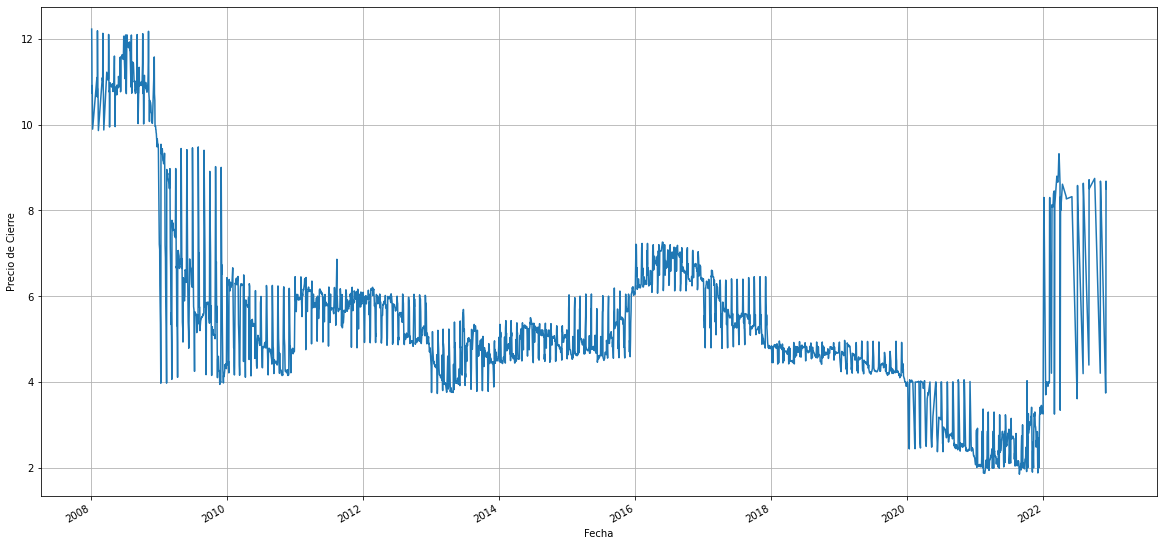

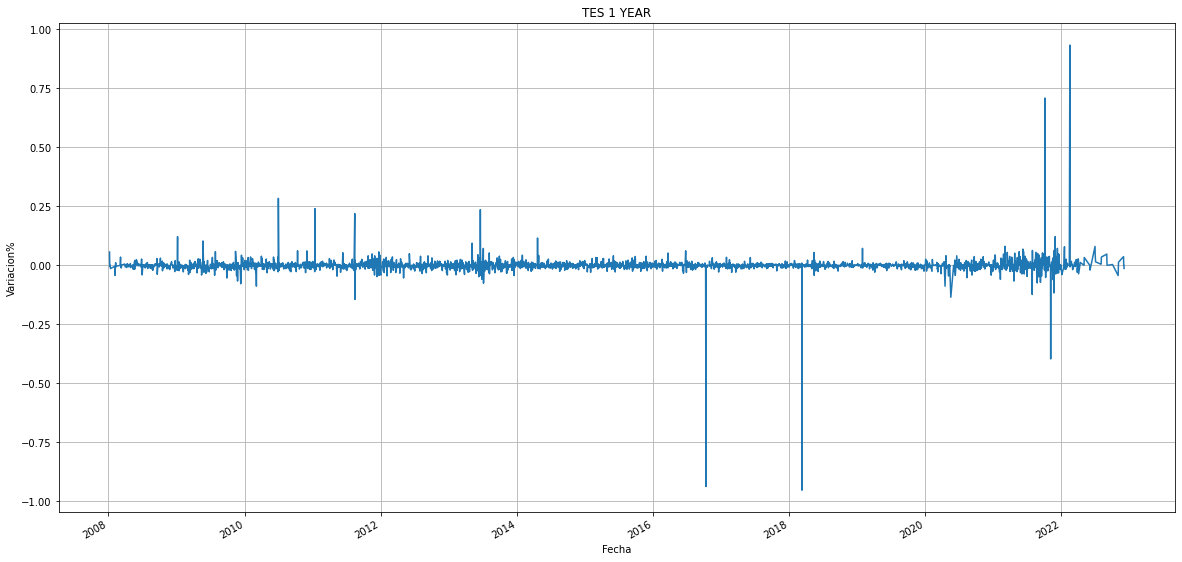

In [6]:
ax1 = df_tes_1_year.plot(use_index=True, y='Último', style=['-'], figsize=(20,10), ylabel='Precio de Cierre', legend=False, grid=True)
ax2 = df_tes_1_year.plot(use_index=True, y='% var.', style=['-'], figsize=(20, 10), ylabel='Variacion%', legend=False, grid=True)

plt.title('TES 1 YEAR')

;

The trend and returns can be observed in the value of the one-year TES, which has been generally bearish, with a significant drop around 2009 and with a significant upward momentum in 2022, this variation is due to the fact that the price in 2022 -02-13 was 4,205 and on 2022-02-16 it became 8,130.

## Dotted Plot

Given that the dataset has a daily variation, a dotted graph allows us to see in a little more detail the gap between one sample and the other for both the closing price and variation.

It is possible to identify some periods where the change in the values was drastric.

The difference in the price of the variation mentioned above is evident

''

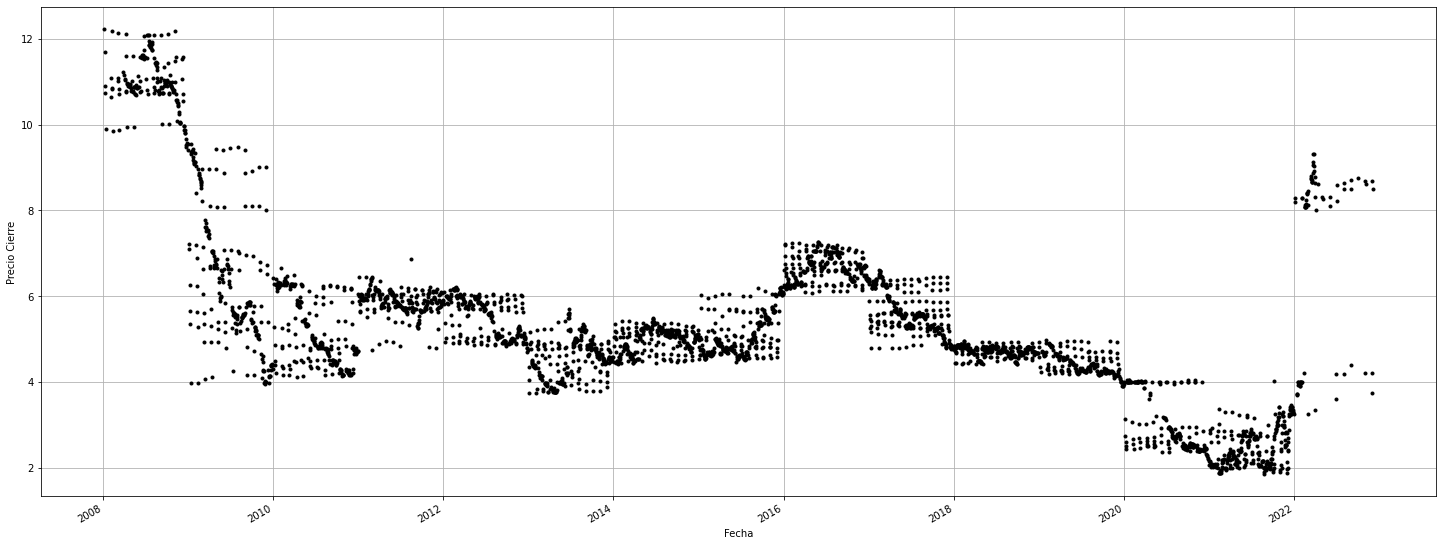

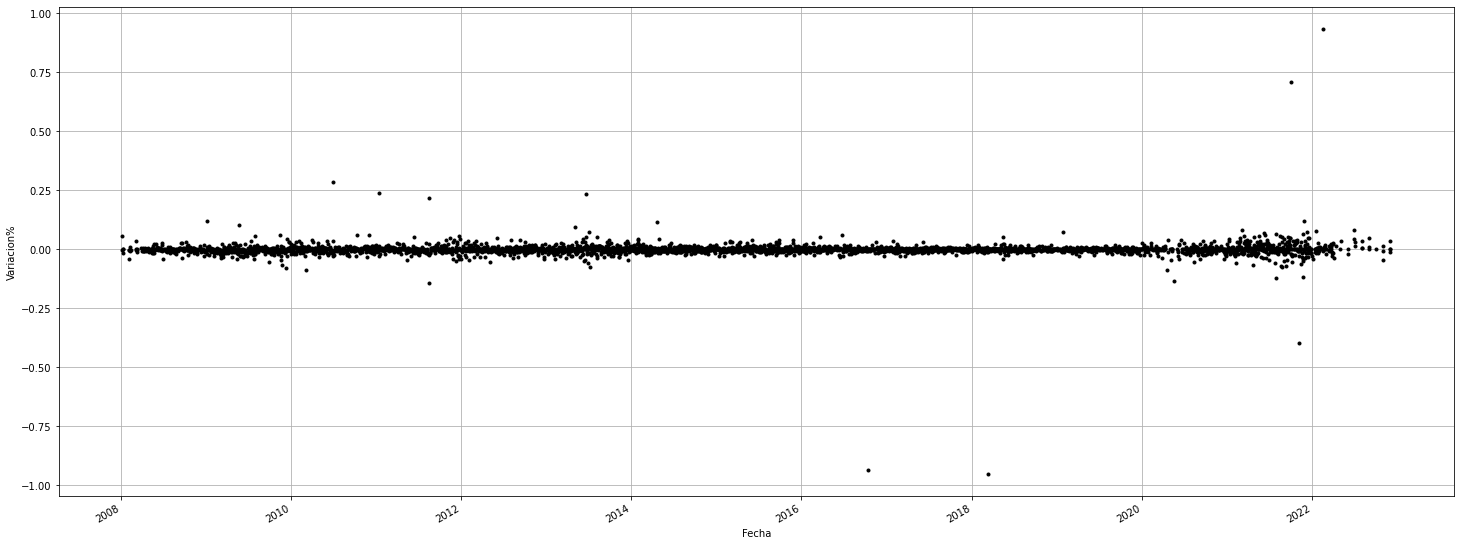

In [7]:
plt.figure()
ax3 = df_tes_1_year['Último'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Precio Cierre')
plt.figure()
ax4 = df_tes_1_year['% var.'].plot(style='k.', grid=True, figsize=(25,10), ylabel='Variacion%')

;

##  Histogram of Prices and Returns


Another valuable analysis is knowing the distribution of our variables. One of the most common ways is through a histogram that evaluates and graphically represents the frequency of the data.

The price for its variation does not present a normal distribution. However, from these data it can be deduced that the control point (higher frequency) is approximately 5 puntos. Although the price has been above 6 points, the most significant values have been between approximately 4.5 and 5.5 points.

On the other hand, the variation presents an apparently normal distribution with values very close to zero

''

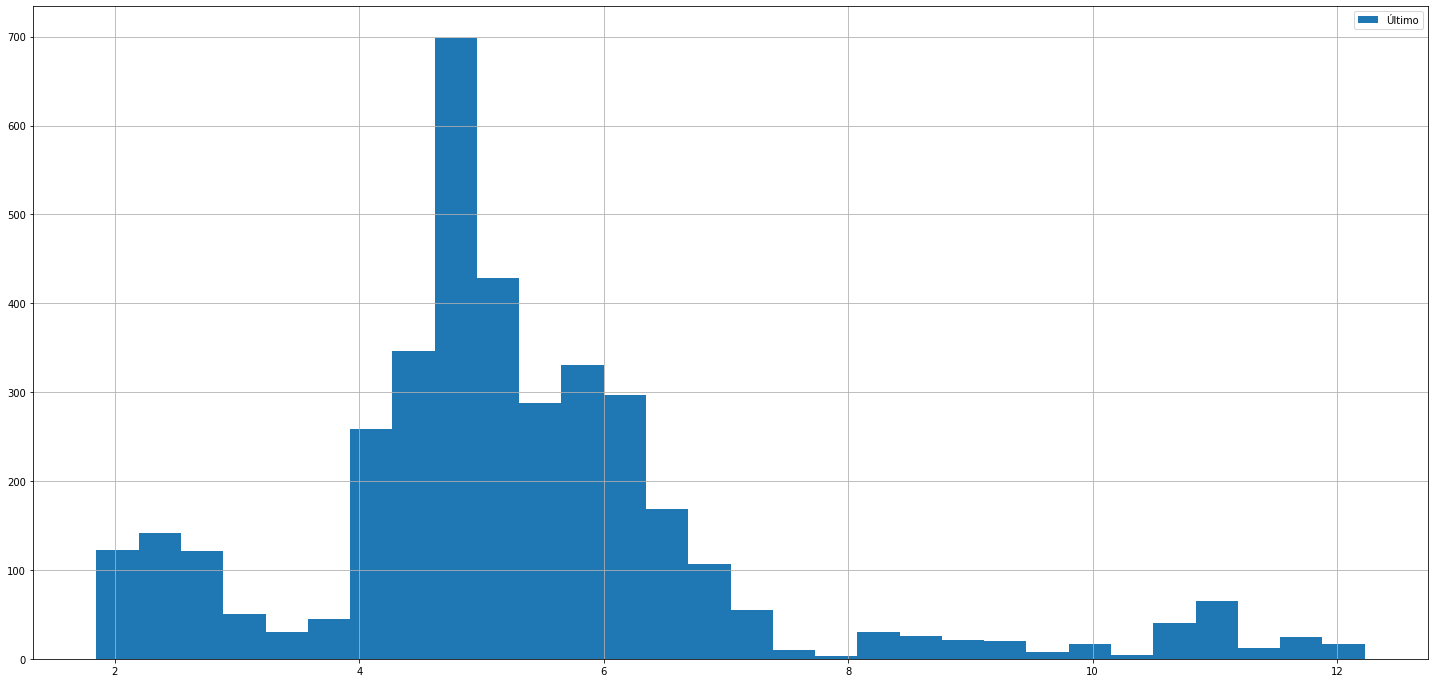

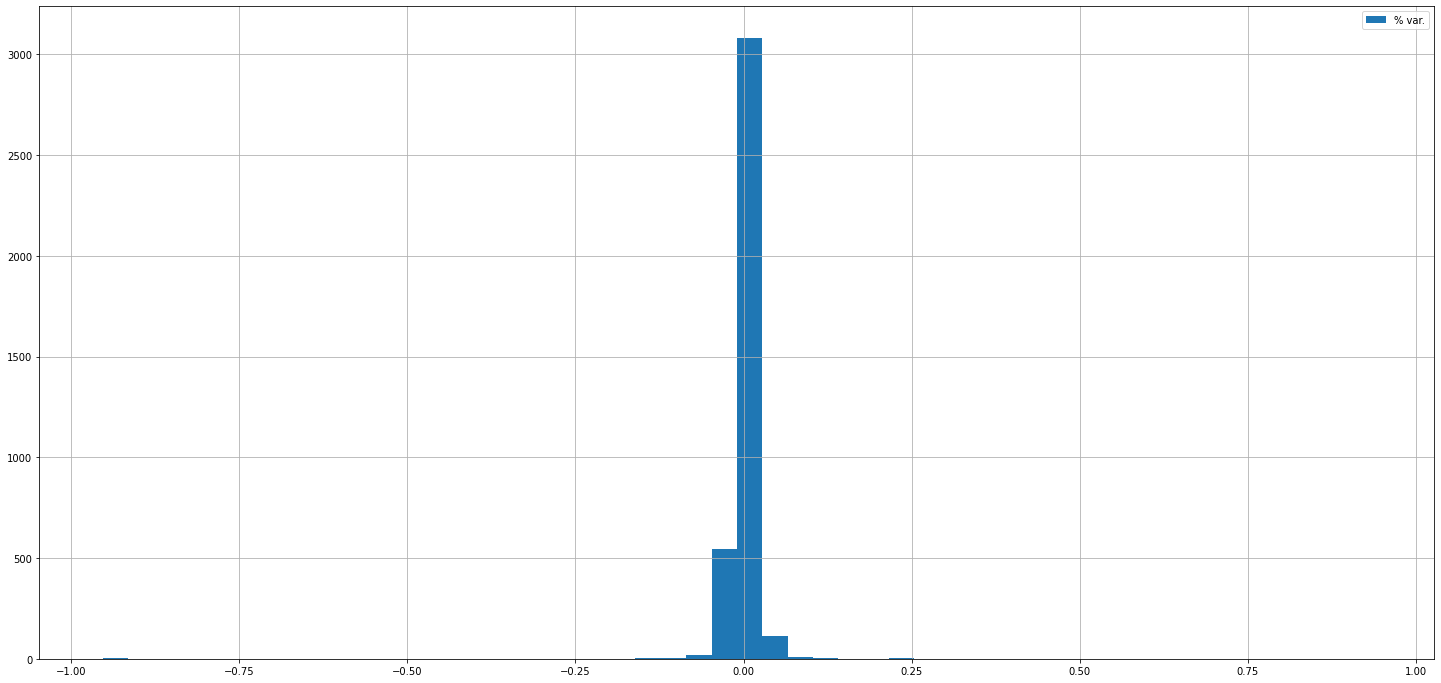

In [8]:
plt.figure()
ax5 = df_tes_1_year['Último'].hist(bins=30, legend=True, figsize=(25,12))

plt.figure()
ax6 = df_tes_1_year['% var.'].hist(bins=50, legend=True, figsize=(25,12))

;

## Kernel Density Plot


Continuing with the previous analysis, a better way to understand the behavior of the price and the variation is by analyzing its density, which by smoothing some data gives us an idea of the prices or variations where the confluence has been greater. This analysis is coherent, because it is possible to identify an inclination between 4.5 and 5.5 aproximately and an aparently normal distribution in %variation

''

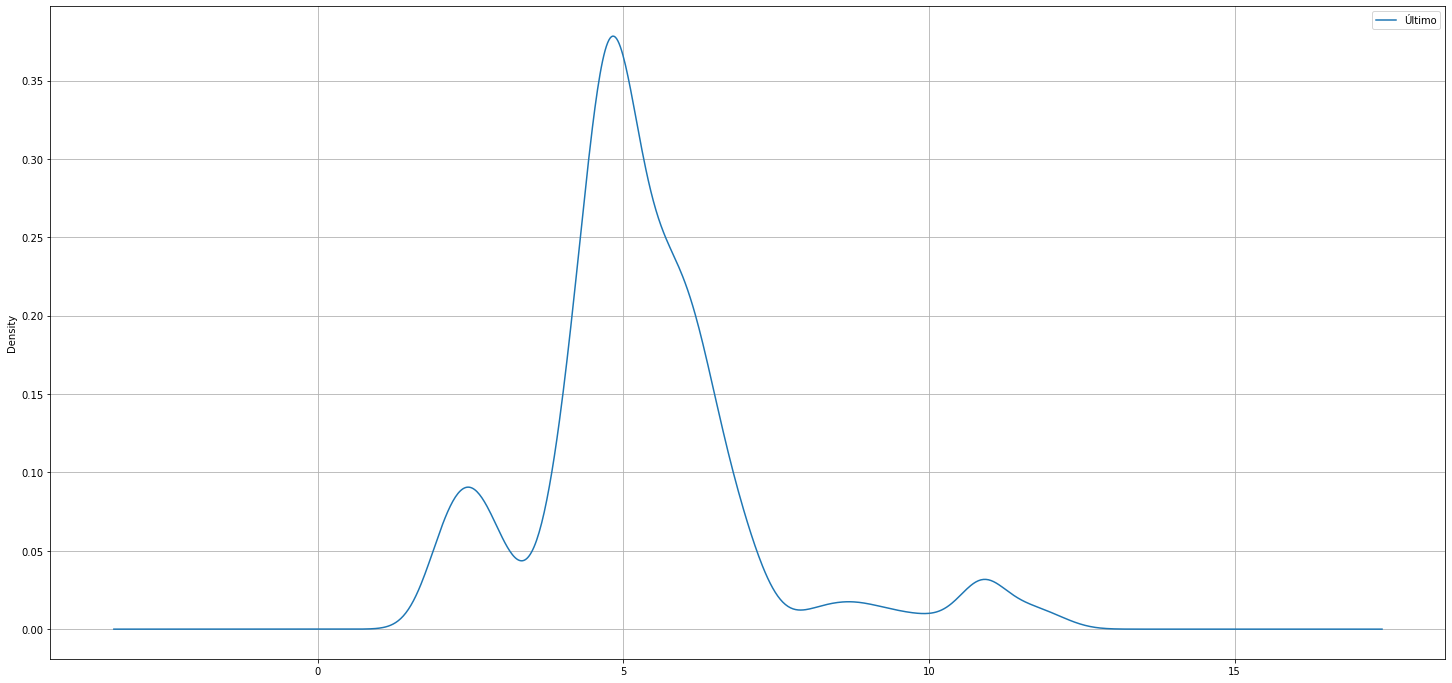

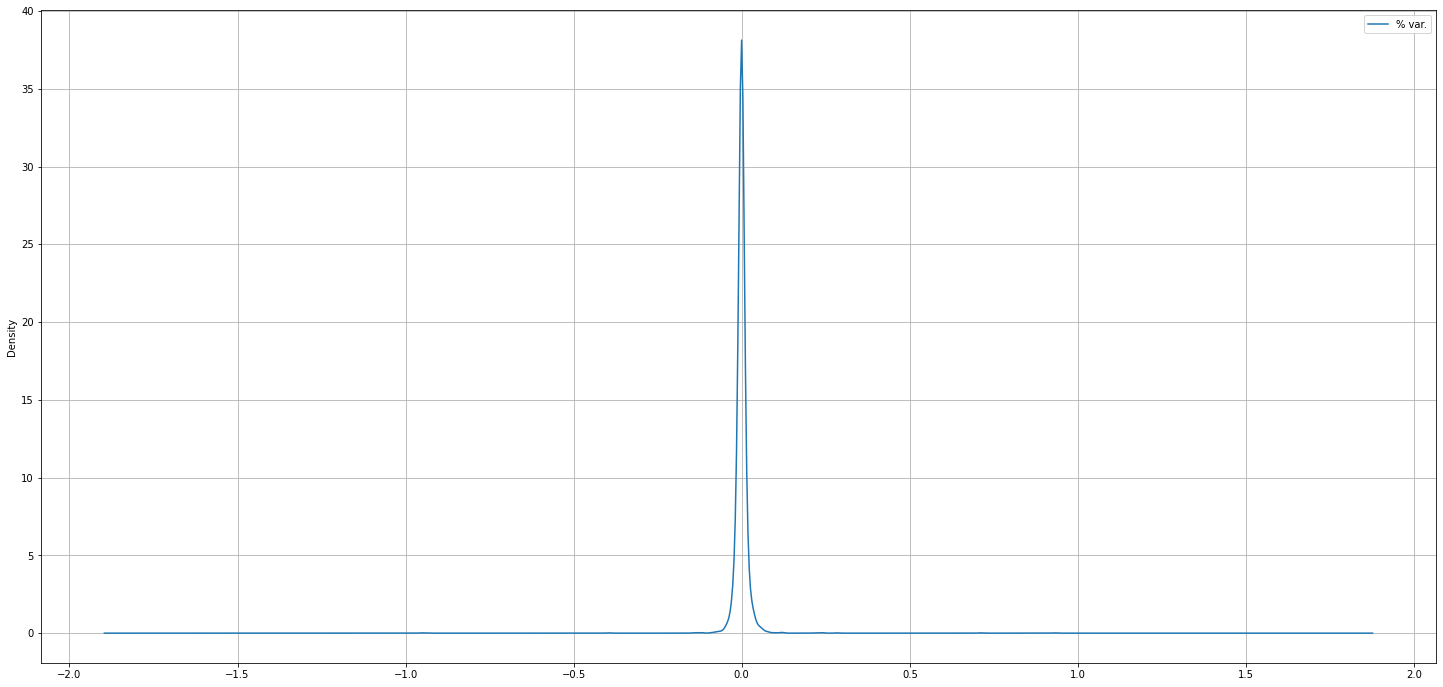

In [9]:
plt.figure()
ax6 = df_tes_1_year['Último'].plot(kind='kde', grid=True, legend=True, figsize=(25,12))
plt.figure()
ax6 = df_tes_1_year['% var.'].plot(kind='kde', grid=True, legend=True, figsize=(25,12))

;

## Plotting Moving Average


Another useful strategy to analyze time series is to reduce the variation of the data by applying filters. A first approximation that we present is through a simple moving average comprised of a window of 200 periods that presents the average evolution of the price based on the previous 200 data. A window of 200 is used because it is an industry standard measure and is used by many institutions to assess the value of stocks.

It is possible to observe a notable deviation of the value of the test before 2010 year and after 2022 because the fluctuation in the value was volatile

''

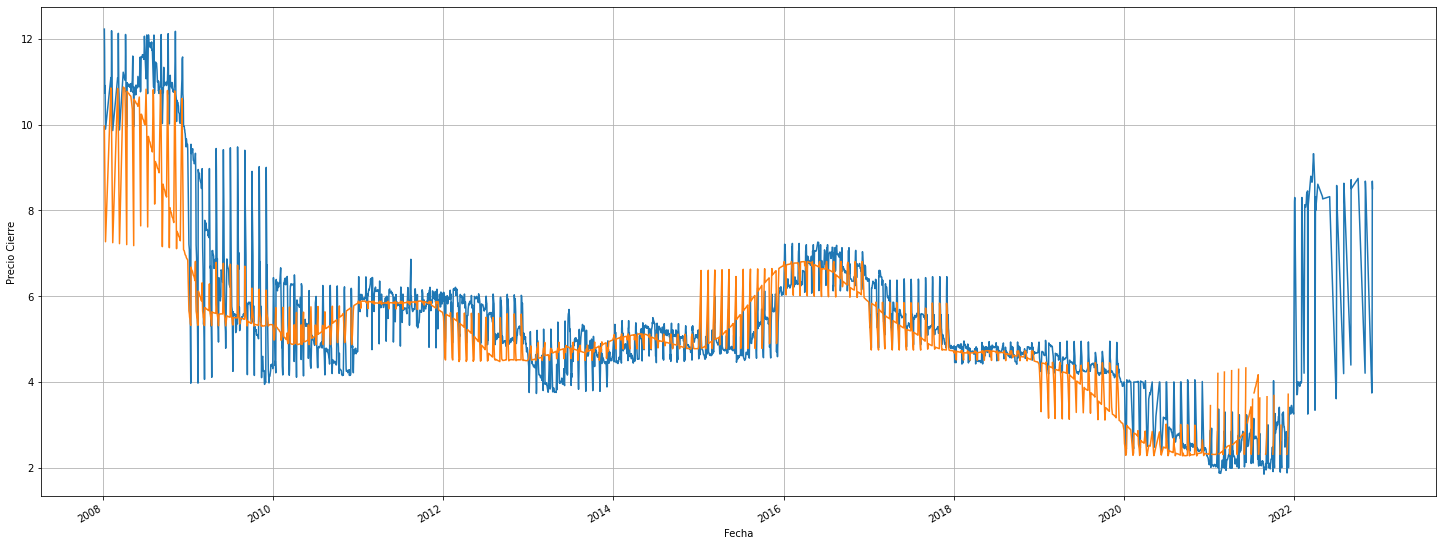

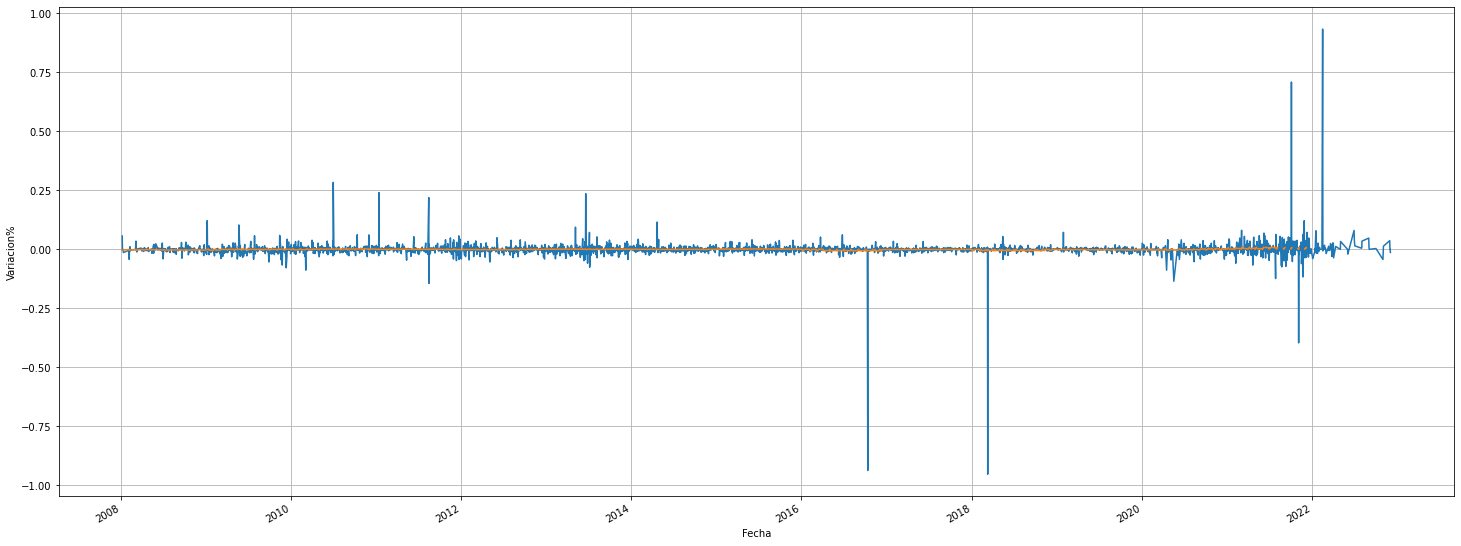

In [10]:
ax1 = df_tes_1_year.plot(use_index=True, y='Último', style=['-'], figsize=(25,10), ylabel='Precio de Cierre', legend=False, grid=True)
price_mean = df_tes_1_year['Último'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Precio Cierre')


ax2 = df_tes_1_year.plot(use_index=True, y='% var.', style=['-'], figsize=(25,10), ylabel='% var.', legend=False, grid=True)
price_mean = df_tes_1_year['% var.'].rolling(200, win_type=None).mean()
price_mean.plot(style=['-', '--', ':'], grid=True, ylabel='Variacion%')
;

## Exponential Smoothing


Since the ultimate goal is to make a prediction model, it is important to reduce the variation of the variable by smoothing it, however, a linear alternative such as the moving average usually generates time shifts in the data, so non-linear options such as the exponential smoothing allows noise to be smoothed without time shift implications



/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


''

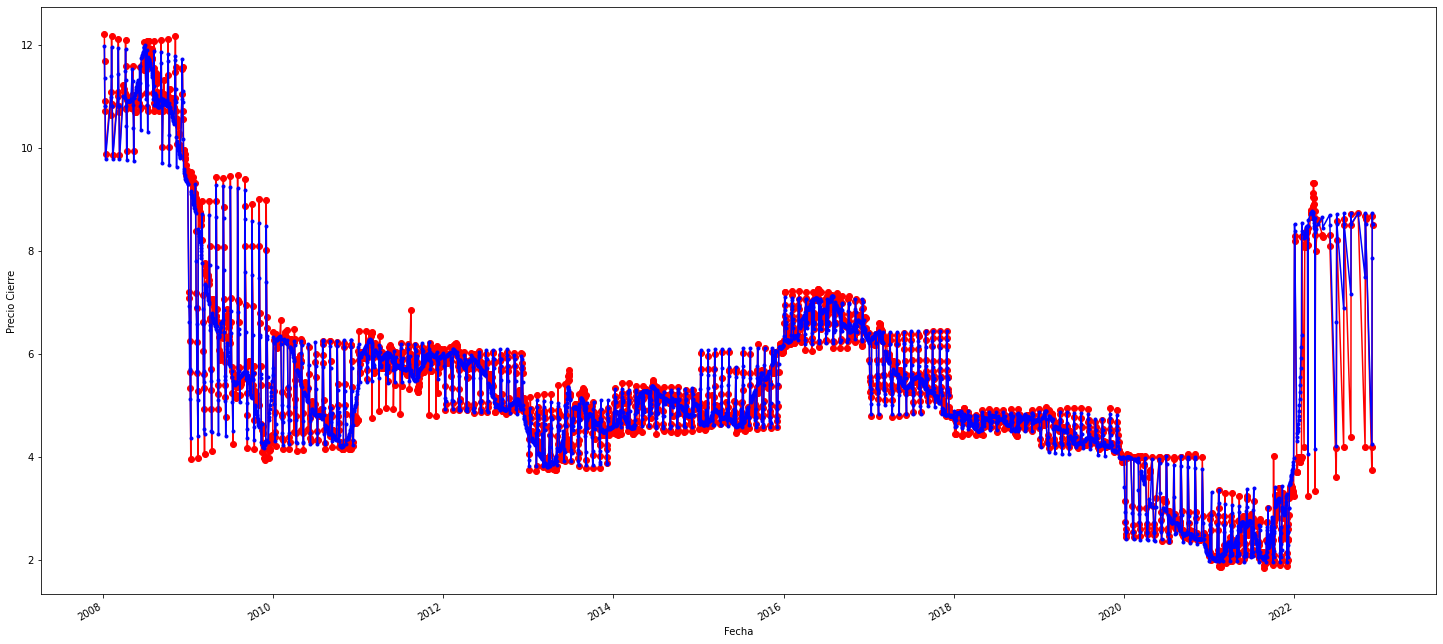

In [11]:
model = SimpleExpSmoothing(df_tes_1_year['Último']).fit(smoothing_level=.1, optimized=True)

df_tes_1_year['Último'].plot(marker='o', color='red', ylabel='Precio Cierre', figsize=(25,12))
model.fittedvalues.plot(marker='.', color='blue')

;

## Lag Plot


It is used to check if the series is random or not. Lag plot allows to do a price analysis between the observation of the sample in *t* and *t+1* where it is tried to verify if there is any pattern that shows that the series is not random, in other words to verify the existence of correlation between the samples.

 In the case of the TES 1 year, there is a positive correlation, which finally implies that its behavior can be modeled. A structure can then be observed that invites us to think of a linear trend in the evolution of the price.

''

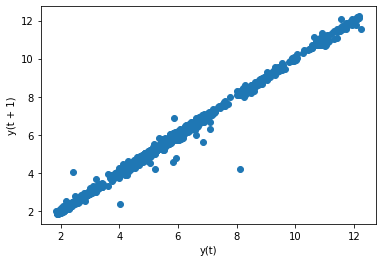

In [12]:
lag_plot(df_tes_1_year['Último'])

;

## Autocorrelation Plot


Autocorrelation plots are a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

Reinforcing the previous conclusion, it can be seen that the correlation of the data is notably far from zero, so the variable of the closing price of the TES does not have a random component that predominates its evolution over time.

''

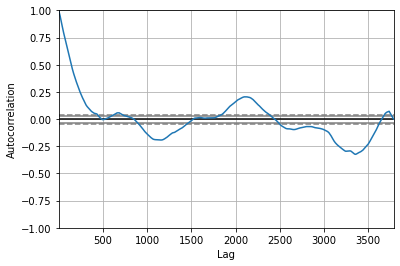

In [13]:
autocorrelation_plot(df_tes_1_year['Último'])

;

## Yearly price trend (seasonal plot)

In [14]:
df_tes_1_year.reset_index(inplace=True)
df_tes_1_year.insert(2, 'year',  df_tes_1_year['Fecha'].apply(lambda x: x.year))
df_tes_1_year.insert(3, 'month',  df_tes_1_year['Fecha'].apply(lambda x: x.month))
df_tes_1_year.insert(4, 'day',  df_tes_1_year['Fecha'].apply(lambda x: x.day))
z = pd.DataFrame(df_tes_1_year.groupby(by = ['year', 'month'])['Último'].mean())
z.reset_index(inplace=True)
z.set_index('month', inplace=True)

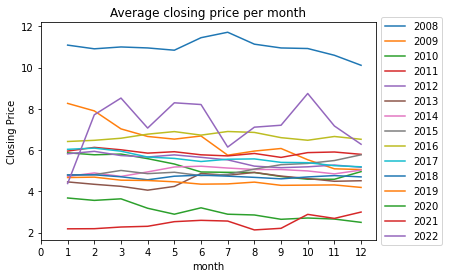

In [15]:
import numpy as np
for i in z['year'].unique():
    z[z['year'] == i]['Último'].plot(label=i)

    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Closing Price')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xticks(np.arange(0, 13, 1))
plt.title('Average closing price per month')
plt.show()

There is no clear pattern in the behavior, an overall context could be a bit bearish or sideways. The range in which it remained more in the different periods was between 4 and 7 approximately

''

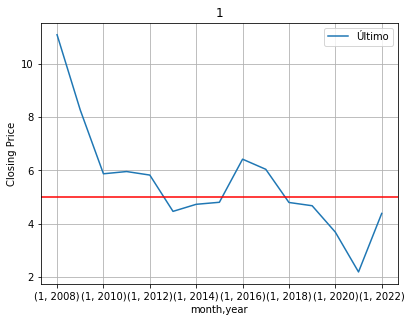

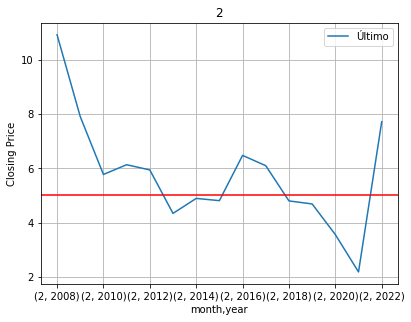

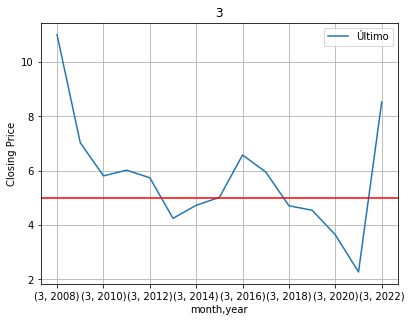

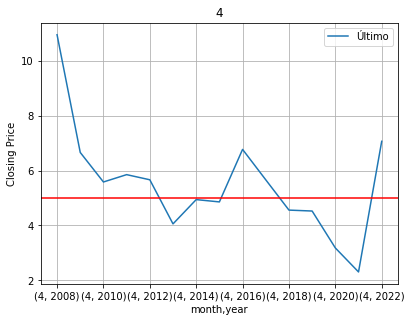

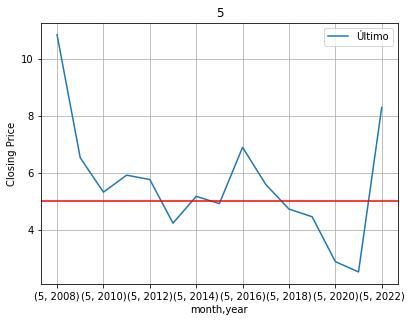

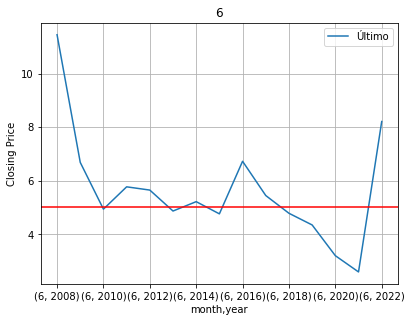

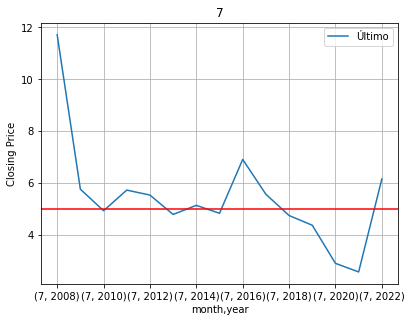

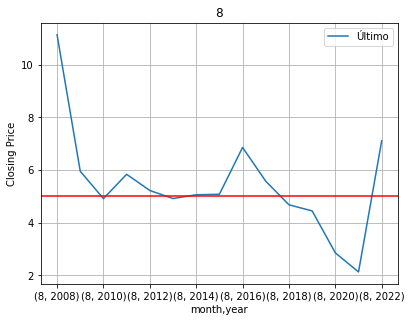

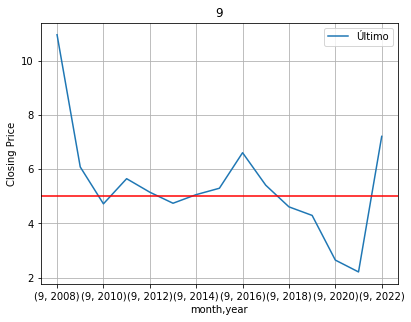

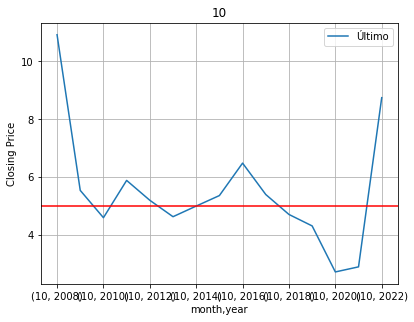

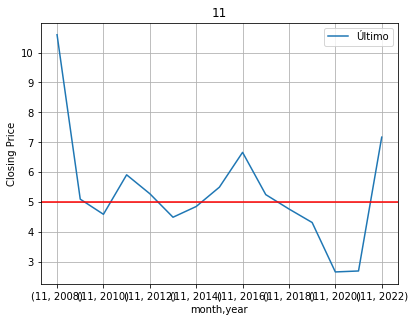

In [16]:
x = z.copy()
x.reset_index(inplace=True)
x.set_index(["month", "year"], inplace=True)
x.sort_index(inplace=True)

for i in range(1, 12, 1):
    x[np.in1d(x.index.get_level_values(0), [i])].plot(label=i)
    plt.axhline(int(x[np.in1d(x.index.get_level_values(0), [i])].mean()),color="red")
    plt.grid()
    plt.ylabel('Closing Price')
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    plt.title(i)


;

A pattern can be observed in the behavior  in the respective
months of the different years. There is a decrease in value
for each of the periods, and this is preceded by a
flat or sideways movement. In general, the TES 1 year shows consistency in decrease,
red line is the average of the prices and an average
similar around 5 which is consistent with the price of the point
of control mentioned in the previous points

In [17]:
df_tes_1_year.head(2)

,Fecha,Último,year,month,day,Apertura,Máximo,Mínimo,% var.
0,2022-04-13,8.610,2022,4,13,8.586,8.610,8.586,0.0122
1,2022-12-04,8.506,2022,12,4,8.540,8.556,8.476,-0.0132


In [18]:
df_out = pd.DataFrame()
df_out['Date'] = pd.to_datetime(df_tes_1_year['Fecha'])
df_out['Instrument Name'] = 'TES1'
df_out['Year'] = df_tes_1_year['year']
df_out['Month'] = df_tes_1_year['month']
df_out['Day'] = df_tes_1_year['day']
df_out['Open'] = df_tes_1_year['Apertura']
df_out['High'] = df_tes_1_year['Máximo']
df_out['Low'] = df_tes_1_year['Mínimo']
df_out['Close'] = df_tes_1_year['Último']
df_out['Close previous'] = df_tes_1_year['Último'].shift(1)
df_out['Variation'] = df_tes_1_year['Último'].pct_change()*100.0
df_out = df_out.set_index('Date').dropna()
df_out

,Instrument Name,Year,Month,Day,Open,High,Low,Close,Close previous,Variation
Date,,,,,,,,,,
2022-12-04,TES1,2022,12,4,8.540,8.556,8.476,8.506,8.610,-1.207898
2022-11-04,TES1,2022,11,4,8.680,8.691,8.620,8.620,8.506,1.340230
2022-09-04,TES1,2022,9,4,8.507,8.507,8.507,8.507,8.620,-1.310905
2022-08-04,TES1,2022,8,4,8.395,8.507,8.304,8.507,8.507,0.000000
2022-07-04,TES1,2022,7,4,8.238,8.260,8.160,8.220,8.507,-3.373692
...,...,...,...,...,...,...,...,...,...,...
2008-04-04,TES1,2008,4,4,0.000,0.000,0.000,11.035,11.068,-0.298157
2008-03-04,TES1,2008,3,4,0.000,0.000,0.000,11.093,11.035,0.525600
2008-02-04,TES1,2008,2,4,0.000,0.000,0.000,11.096,11.093,0.027044


In [19]:
path_out = '../data/dev/TES 1 año.csv'
df_out.to_csv(path_out, encoding='utf-8')